Data Loading and Preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = train_images[..., np.newaxis]  # (60000, 28, 28, 1)
test_images = test_images[..., np.newaxis]    # (10000, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


 Model Creation


In [2]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Model Compilation


In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model Training

In [4]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8930 - loss: 0.3473 - val_accuracy: 0.9882 - val_loss: 0.0384
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0478 - val_accuracy: 0.9877 - val_loss: 0.0392
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0326 - val_accuracy: 0.9898 - val_loss: 0.0392
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.9905 - val_loss: 0.0356
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9936 - loss: 0.0199 - val_accuracy: 0.9918 - val_loss: 0.0272


Model Evaluation

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0285
Test accuracy: 99.27%


Make Predictions

In [7]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Visualize Predictions

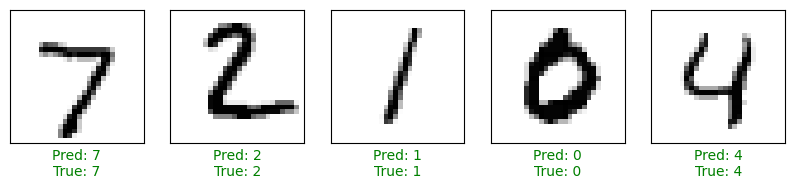

In [8]:
def plot_image(i, predictions_array, true_label, img):
    pred_label = np.argmax(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)
    color = 'green' if pred_label == true_label else 'red'
    plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}", color=color)

# Show first 5 predictions
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.show()


In [9]:
# Save model
model.save("digit_cnn_model.h5")

# Load later like this:
# model = tf.keras.models.load_model("digit_cnn_model.h5")


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


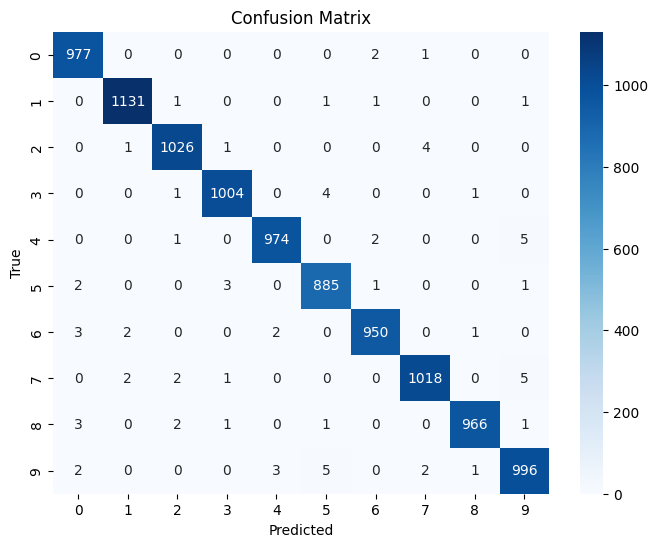

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

pred_labels = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(test_labels, pred_labels))


Accuracy Plot

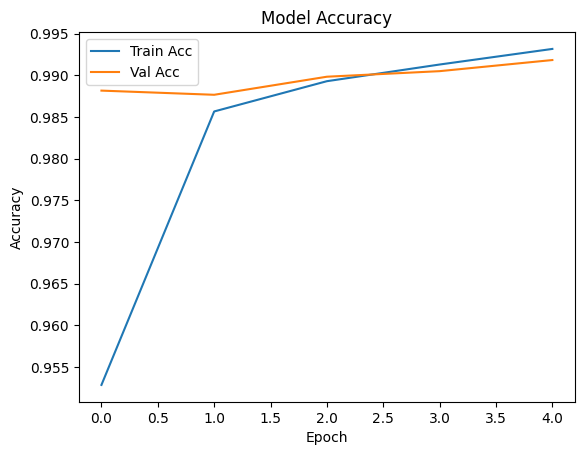

In [11]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
